In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib .pyplot as plt

import os
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')       # لتجاهل رسائل التنبيه

In [2]:
data=pd.read_csv("D:\one drive\OneDrive\Desktop\works\car_price_prediction.csv")

In [3]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# 1- Explore Data 

In [4]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
data.shape

(19237, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
data.duplicated().sum()

313

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(18924, 18)

In [11]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# 2- Analysis

In [12]:
data["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [13]:
for col in data.columns:
    print(col,":",data[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


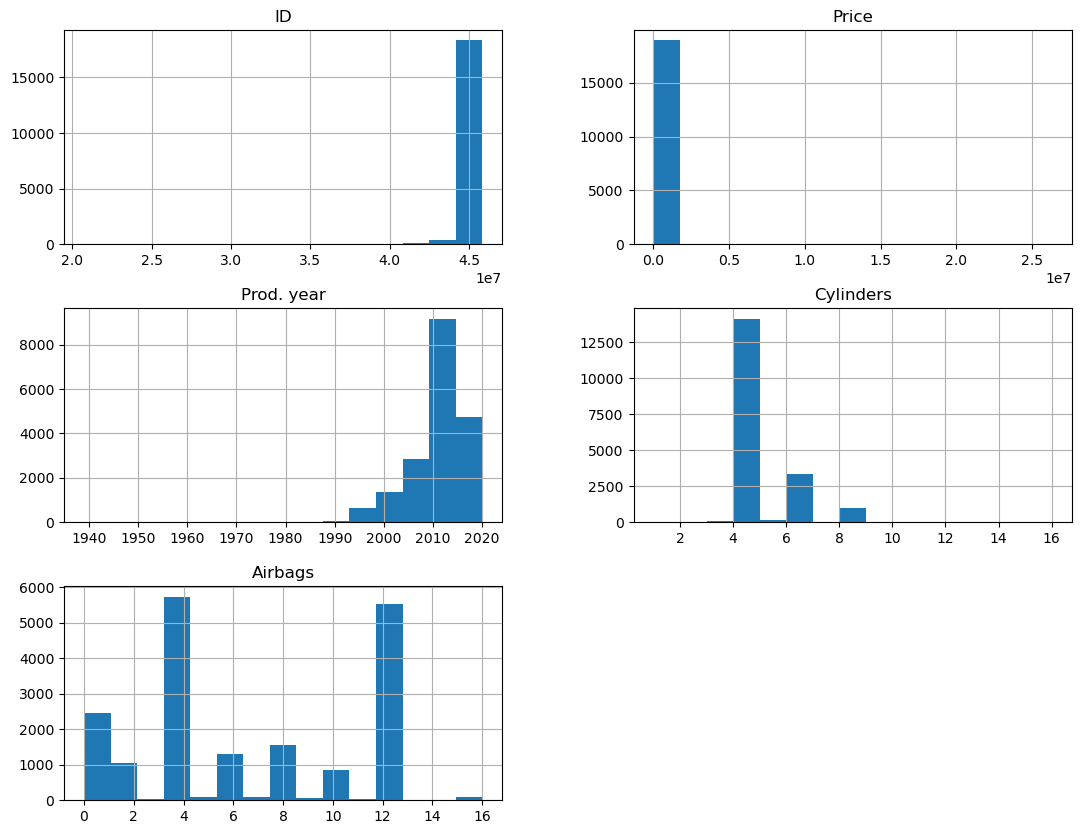

In [14]:
data.hist(bins=15,figsize=(13,10))
plt.show()

In [15]:
cars=data["Manufacturer"].value_counts().sort_values(ascending=False)[:60]
cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
SSANGYONG         439
KIA               417
OPEL              396
MITSUBISHI        288
SUBARU            274
AUDI              254
MAZDA             175
JEEP              138
DAEWOO             91
DODGE              90
SUZUKI             76
FIAT               76
PORSCHE            52
LAND ROVER         48
VAZ                47
MINI               47
JAGUAR             42
RENAULT            36
INFINITI           26
CHRYSLER           26
SKODA              20
VOLVO              19
PEUGEOT            17
BUICK              16
LINCOLN            15
ACURA              15
GMC                15
CADILLAC           14
DAIHATSU           13
GAZ                12
UAZ                12
CITROEN             9
SCION               7
HUMMER              5
MASERATI            4
MERCURY   

In [16]:
len(data["Manufacturer"].value_counts())

65

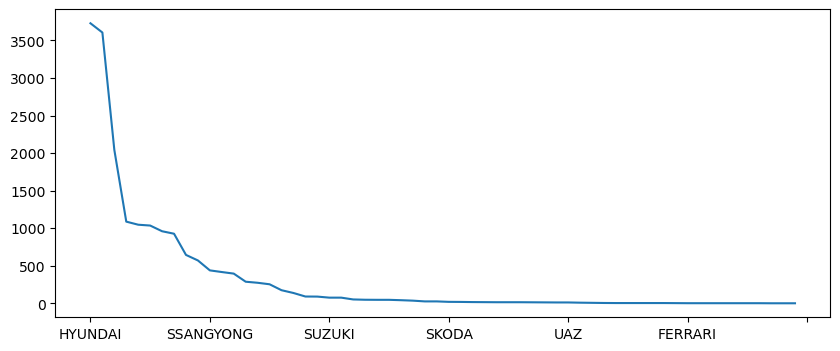

In [17]:
cars.plot(figsize=(10,4))
plt.show()

In [18]:
top10_cars=data["Manufacturer"].value_counts().sort_values(ascending=False)[:10]
top10_cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

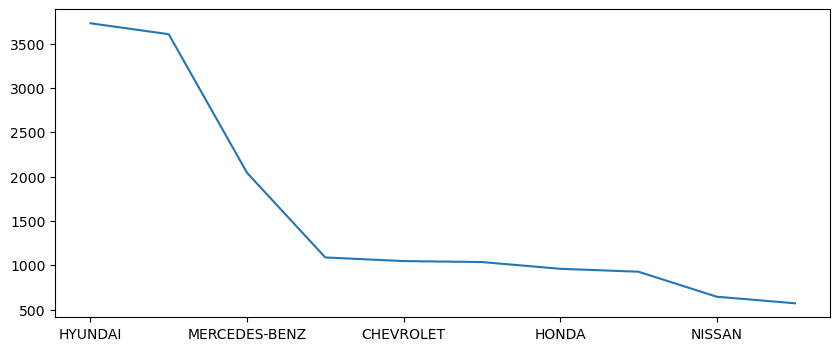

In [19]:
top10_cars.plot(figsize=(10,4))
plt.show()

In [20]:
top10_cars=data["Manufacturer"].value_counts().sort_values(ascending=False)[:10]
top10_cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

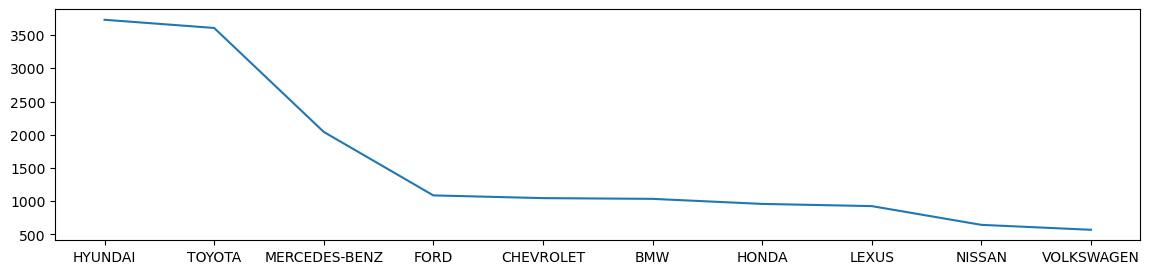

In [21]:
plt.figure(figsize=(14, 3))                           # هاي يلي بدي استخدمها للرسومات 
plt.plot(top10_cars)
plt.show()

In [22]:
top10_carsprice_mean=[data[data["Manufacturer"]==i]['Price'].mean() for i in list(top10_cars.index)]      # price of cars

In [23]:
top10_carsprice_mean

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

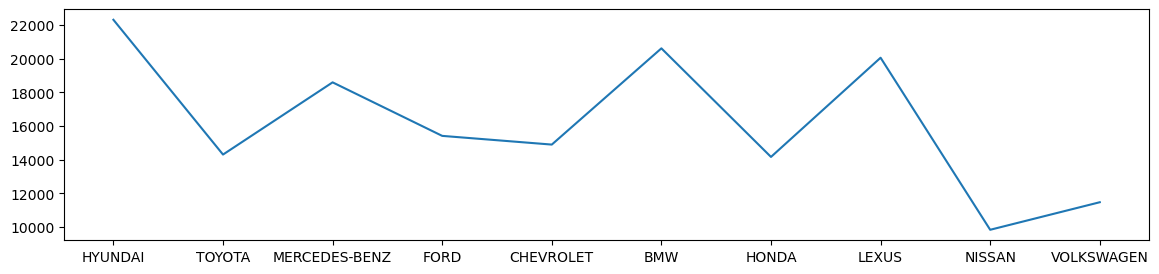

In [24]:
plt.figure(figsize=(14, 3))
plt.plot(top10_cars.index,top10_carsprice_mean)
plt.show()

In [25]:
cor=data.corr()                   # لقياس الارتباط ما بين البيانات ويهمل البيانات النصية 
cor

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


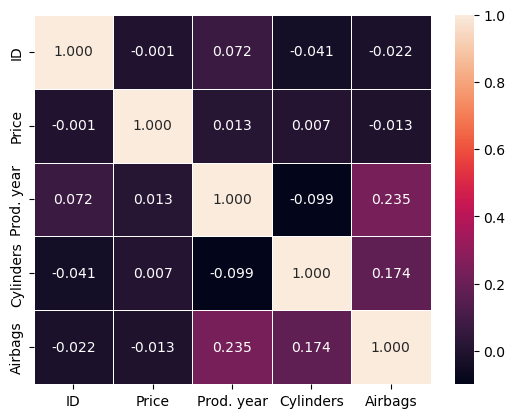

In [26]:
sns.heatmap(cor,linewidth=('0.5'),annot=True,fmt='.3f')              # linewidth == lw  لتكبير الخطوط
plt.show()                                                 # annot = True  ..... boxلوضع الارقام داخل ال 
                                                           # format == fmt  .....  لتقريب الكسر العشري

In [27]:
data_object=data.select_dtypes(include='object')
data_object

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


In [28]:
data_object.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


In [29]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              18924 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


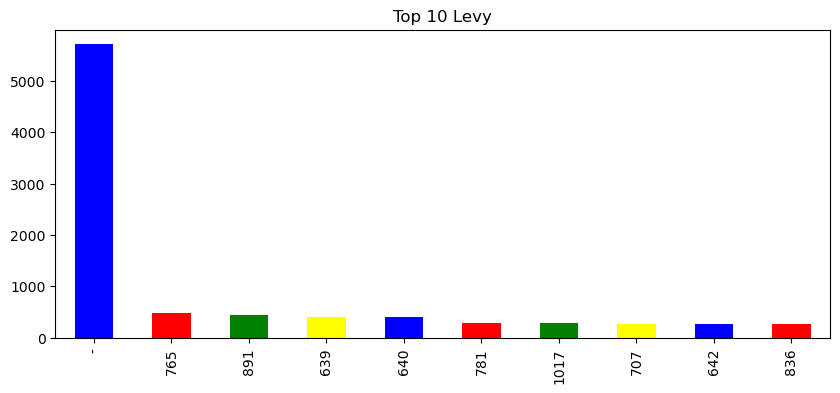

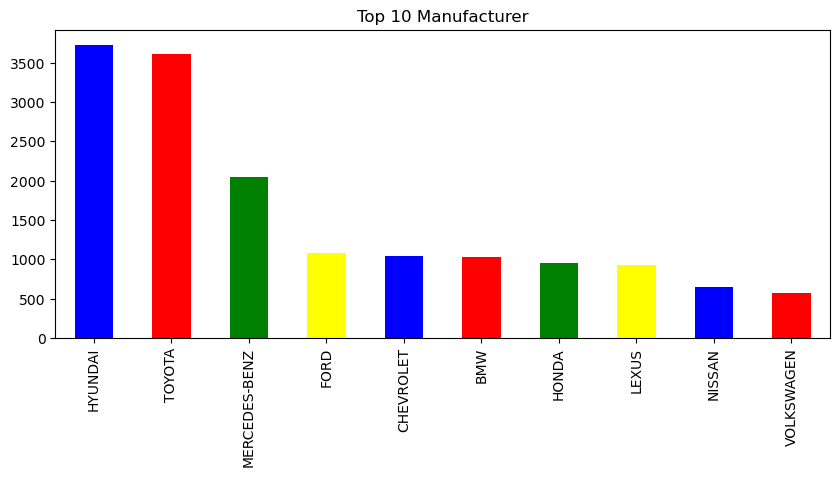

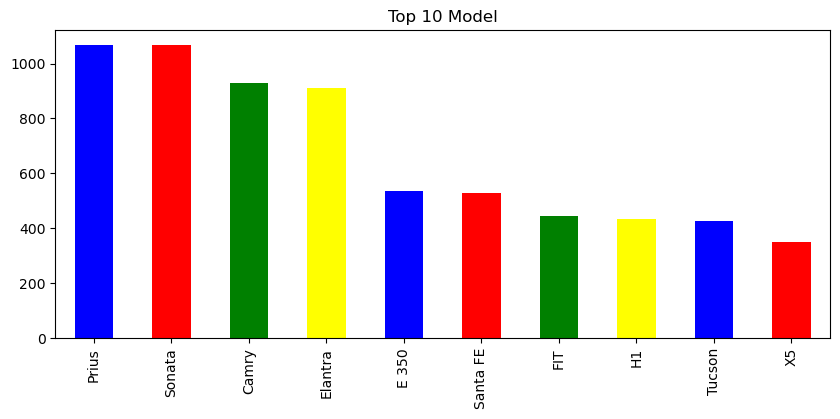

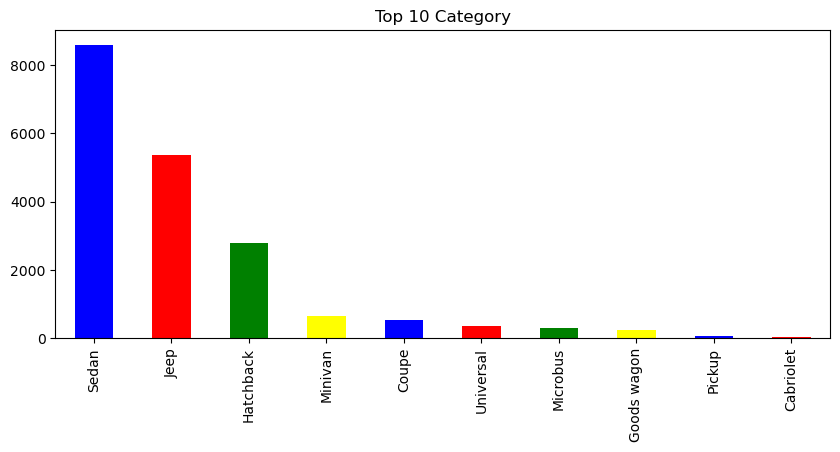

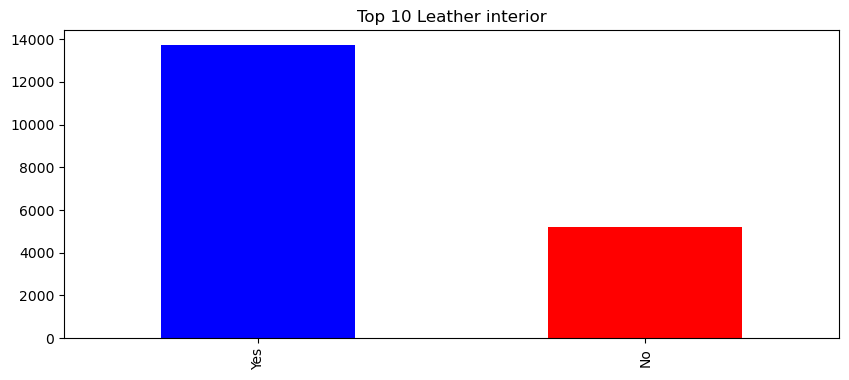

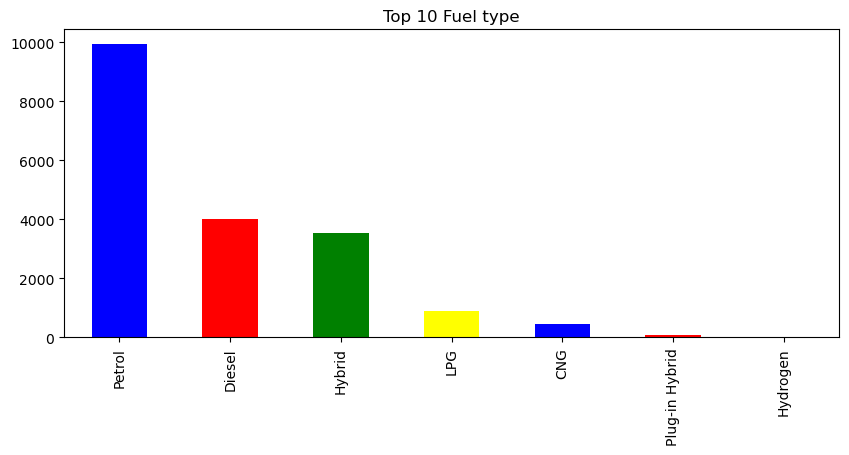

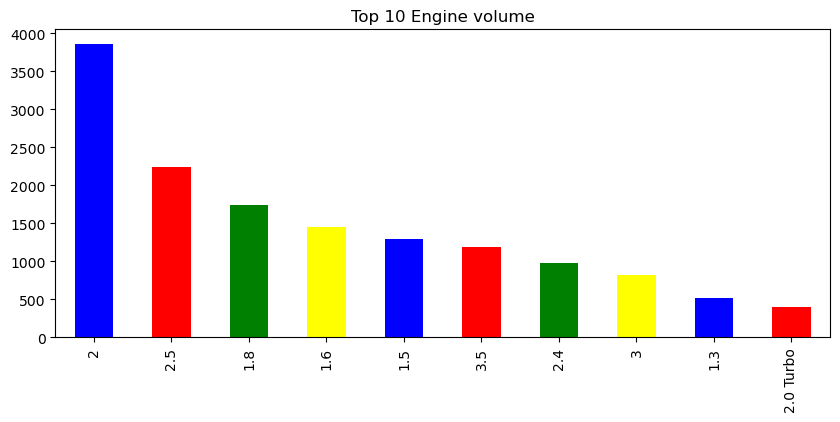

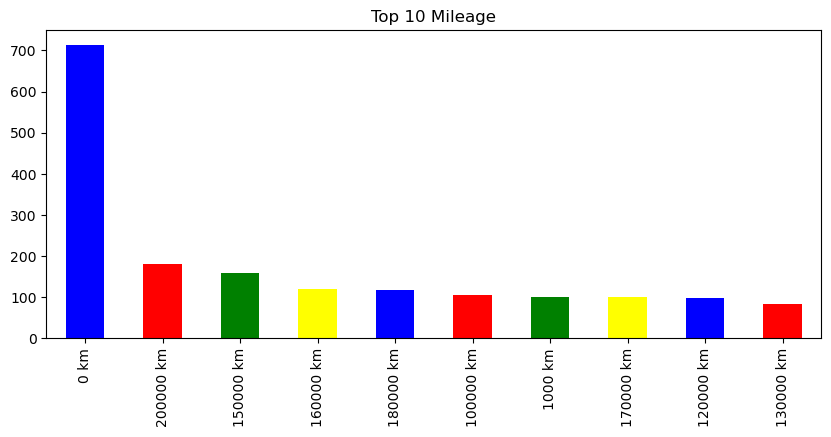

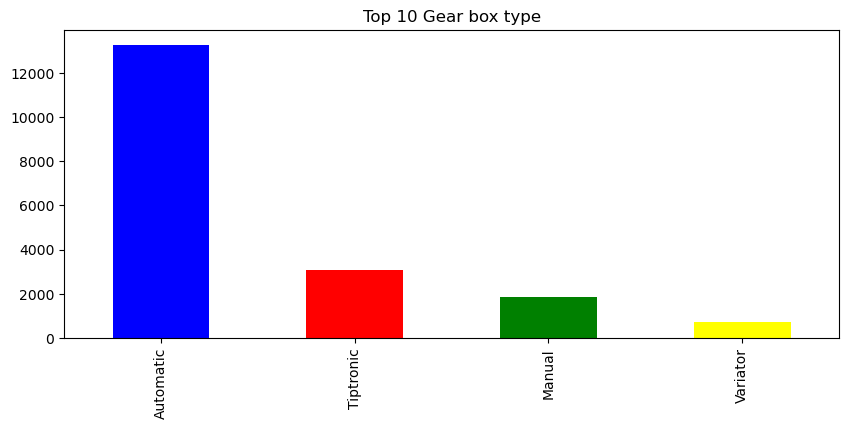

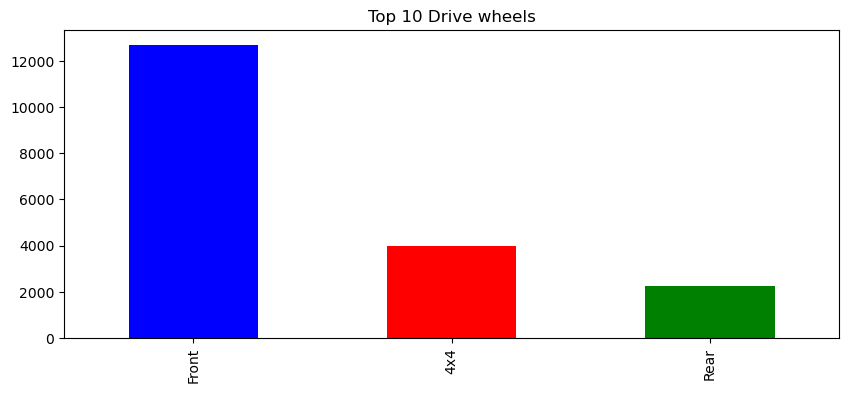

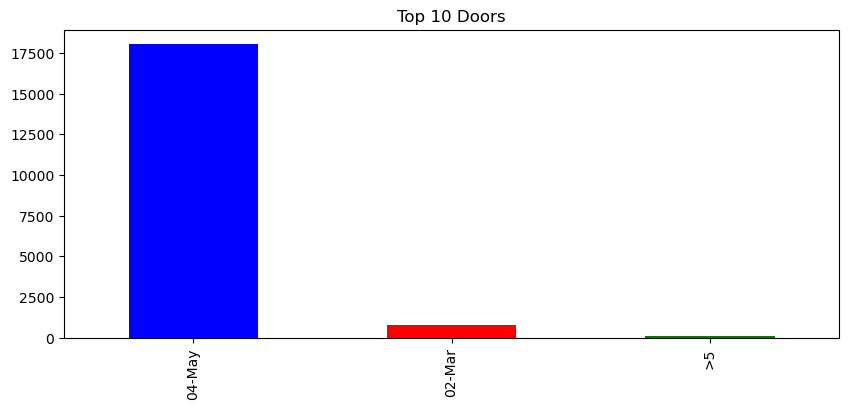

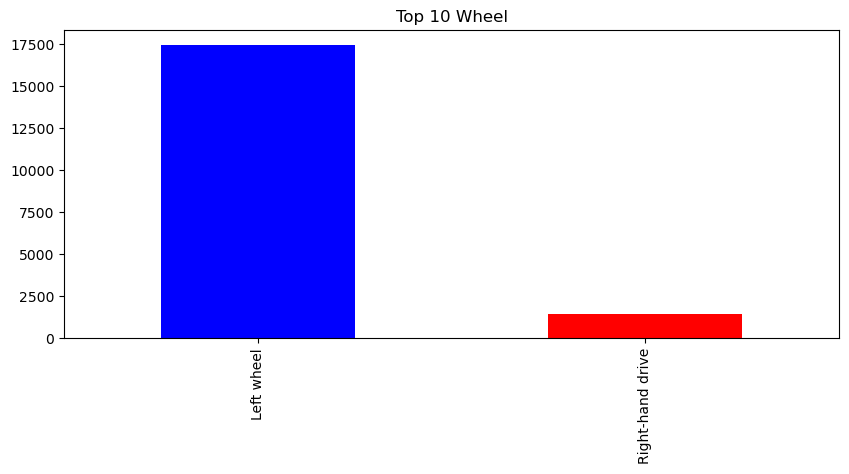

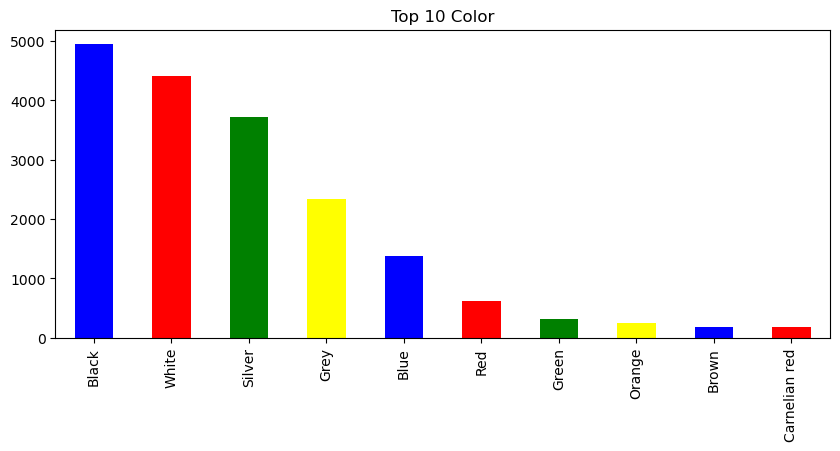

In [30]:
for col in data_object:
    plt.figure(figsize=(10,4))                   # رسم مربع للرسمات البيانية 
    top10=data[col].value_counts()[:10]          # عدد كل عنصر فيه واكبر عدد عشر عناصر 
    colors=["blue","red","green","yellow"]
    top10.plot(kind='bar',color=colors)
    plt.title('Top 10'+" "+ col)

# **Data Processing**

In [31]:
data = data.drop(['ID', 'Doors'], axis=1)    # when i work with more then one feature(('ID','Doors')) i have to use list[]
                                             # axis = 1 column , 0 row

In [32]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


# Date

In [33]:
import datetime
dtime=datetime.datetime.now()

In [34]:
# calculate the car age 
data['Age']=dtime.year-data['Prod. year']      # data['Age'] for making new column called Age

In [35]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [36]:
data=data.drop(['Prod. year'],axis=1)
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,25
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,13
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,14
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,17


# Levy

In [37]:
data.Levy.replace({'-','0'},inplace=True)        # عملنا replace مباشرة لانو كله ارقام

In [38]:
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce').fillna(0).astype(int)

##### data.Levy.value_counts()--------------            # to make sure if (-) replaced with 0 the result is in the first row 
#### #data.info( --------------                     # to make sure if it's become int 

In [39]:
data.head(3)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18


# Milage

In [40]:
data["Mileage"]=data["Mileage"].str.replace("km","")           # str تدل على انني بدي ابدل النص الموجود بالخلايا لانو انا هون بتعامل مع (int,str)

In [41]:
data.head(2)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13


# Engine volume

In [42]:
data["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [43]:
data["Engine volume"]=data["Engine volume"].str.replace("Turbo","")
data.head(11)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10
5,39493,891,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,Left wheel,White,4,8
6,1803,761,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,14
7,549,751,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,Left wheel,Grey,12,11
8,1098,394,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,Left wheel,Black,12,10
9,26657,0,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,Left wheel,Silver,12,17


In [44]:
data["Engine volume"]=data["Engine volume"].astype(float)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int32(1), int64(3), objec

## Detect OutLire
### كم نسبة ال out بالنسبة لل data

In [46]:
data_numeric = data.select_dtypes(include = [int,float])  # or (exclude = 'object')
for col in data_numeric:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR = q3-q1
    print(col,":",IQR)

Price : 16732.0
Levy : 917.0
Engine volume : 0.7
Cylinders : 0.0
Airbags : 8.0
Age : 6.0


In [47]:
data_numeric = data.select_dtypes(include = [int,float])  # or (exclude = 'object')
for col in data_numeric:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    print(col, ":", IQR)
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR
    Outlire = ((data_numeric[col] > high) | (data_numeric[col] < low)).sum()
    data_count = data_numeric[col].shape[0]
    print(f"Total Outlire in {col} are : {Outlire} -- {round(100 * (Outlire) / data_count, 2)}%")                                        # جيبلي الاسطر تبعتها shape[0] 

Price : 16732.0
Total Outlire in Price are : 1055 -- 5.57%
Levy : 917.0
Total Outlire in Levy are : 160 -- 0.85%
Engine volume : 0.7
Total Outlire in Engine volume are : 1358 -- 7.18%
Cylinders : 0.0
Total Outlire in Cylinders are : 4765 -- 25.18%
Airbags : 8.0
Total Outlire in Airbags are : 0 -- 0.0%
Age : 6.0
Total Outlire in Age are : 962 -- 5.08%


In [48]:
data_numeric = data.select_dtypes(include = [int,float])  # or (exclude = 'object')
for col in data_numeric:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    print(col, ":", IQR)
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR
    Outlire = ((data_numeric[col] > high) | (data_numeric[col] < low)).sum()
    data_count = data_numeric[col].shape[0]
    print(f"Total Outlire in {col} are : {Outlire} -- {round(100 * (Outlire) / data_count, 2)}%")                                        # جيبلي الاسطر تبعتها shape[0] 
    
    
    if Outlire>0:                           # اعطيني البيانات يلي بالنص يلي مش out
        data=data.loc[(data[col]<=high) & (data[col]>=low)]

Price : 16732.0
Total Outlire in Price are : 1055 -- 5.57%
Levy : 891.0
Total Outlire in Levy are : 172 -- 0.91%
Engine volume : 0.7
Total Outlire in Engine volume are : 1358 -- 7.18%
Cylinders : 0.0
Total Outlire in Cylinders are : 4765 -- 25.18%
Airbags : 6.0
Total Outlire in Airbags are : 0 -- 0.0%
Age : 5.0
Total Outlire in Age are : 1777 -- 9.39%


# Transform Data   تحويل رقمي لنصي والعكس 

In [49]:
dobject= data.select_dtypes(include='object')   # تحتوي 
dnumeric= data.select_dtypes(exclude='object')   # لا تحتوي 

In [50]:
la= LabelEncoder()      # LabelEncoder بيعمل تحويل لل data

In [51]:
for i in range (0 , dobject.shape[1]):     # 0 rows , dobject.shape[1]  columns   جميع الاسطر الموجودة بالاعمدة
    dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])    # : rows , i columns

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12240 non-null  int64  
 1   Levy              12240 non-null  int32  
 2   Manufacturer      12240 non-null  object 
 3   Model             12240 non-null  object 
 4   Category          12240 non-null  object 
 5   Leather interior  12240 non-null  object 
 6   Fuel type         12240 non-null  object 
 7   Engine volume     12240 non-null  float64
 8   Mileage           12240 non-null  object 
 9   Cylinders         12240 non-null  float64
 10  Gear box type     12240 non-null  object 
 11  Drive wheels      12240 non-null  object 
 12  Wheel             12240 non-null  object 
 13  Color             12240 non-null  object 
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int32(1), int64(3), objec

In [53]:
dobject=dobject.astype(int)

In [54]:
data=pd.concat([dobject,dnumeric],axis=1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int32  
 1   Model             12240 non-null  int32  
 2   Category          12240 non-null  int32  
 3   Leather interior  12240 non-null  int32  
 4   Fuel type         12240 non-null  int32  
 5   Mileage           12240 non-null  int32  
 6   Gear box type     12240 non-null  int32  
 7   Drive wheels      12240 non-null  int32  
 8   Wheel             12240 non-null  int32  
 9   Color             12240 non-null  int32  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int32  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memor

# 4-Model (ML)

In [56]:
x= data.drop('Price',axis=1)  # features
y=data['Price']               # target

In [57]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
                            # مدى ارتباط ال Algo , قياس مدى الخطأ بالتوقع  (المقاييس)
from sklearn.metrics import r2_score , mean_squared_error

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
Algorithm= ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','SVR']
R2= []
RMSE= []

In [61]:
def models(model):
    model.fit(x_train , y_train)
    pre=model.predict(x_test)        # التوقع يلي عندي 
    r2= r2_score(y_test,pre)         # قياس مدى الكفأة عندي الاداء عندي مع النتيجة الحقيقية 
    R2.append(r2)                      # ضيف عنصر اخر الل list
    rmse= np.sqrt(mean_squared_error(y_test,pre))
    RMSE.append(rmse)
    score= model.score(x_test, y_test)
    print(f"The score of model is :{score}")

In [63]:
model1= LinearRegression()
model2= DecisionTreeRegressor()
model3= RandomForestRegressor()
model4= GradientBoostingRegressor()
model5= XGBRegressor()
model6= SVR() 

In [64]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)

The score of model is :0.20929777978571162
The score of model is :0.6355638861824451
The score of model is :0.7738789830191023
The score of model is :0.6634716740956448
The score of model is :0.757577350123255
The score of model is :-0.0035827202334552943


In [65]:
df=pd.DataFrame({'Algorithm':Algorithm ,  'R2' :R2 , 'RMSE' : RMSE})       # افضل خوارزمية هي التي تمتلك اعلى R2 
df                                                                         # واقل RMSE

,Algorithm,R2,RMSE
0,LinearRegression,0.209298,9896.477993
1,DecisionTreeRegressor,0.635564,6718.694399
2,RandomForestRegressor,0.773879,5292.302370
3,GradientBoostingRegressor,0.663472,6456.319244
4,XGBRegressor,0.757577,5479.750452
5,SVR,-0.003583,11149.381387


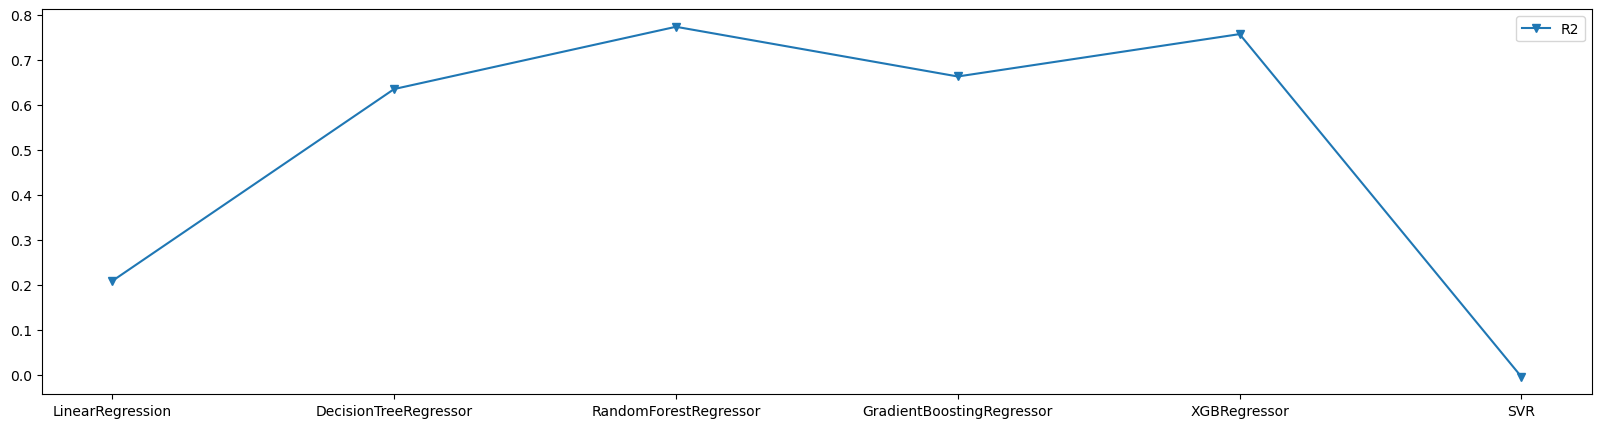

In [66]:
# كل ما كان اعلى بالنسبة ل R2 بكون افضل اشي 
fig, sx=plt.subplots(figsize= (20,5))
plt.plot(df.Algorithm , df.R2, label='R2', marker='v' )
plt.legend()
plt.show()

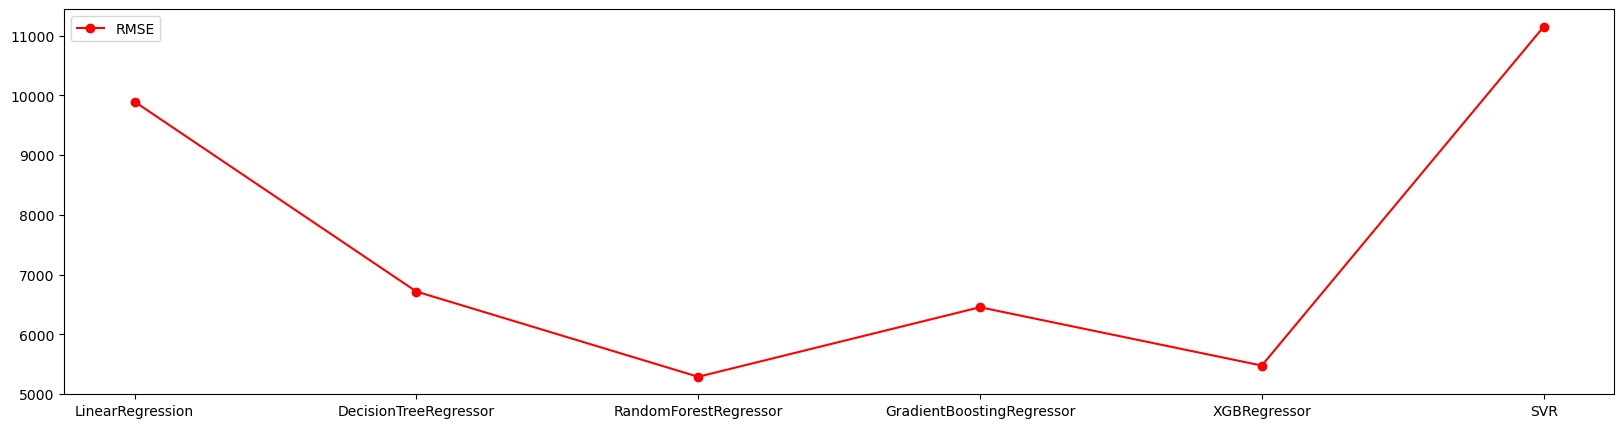

In [67]:
# كل ما كان اقل كل ما كان افضل لنسبة الخطا تبعنا يكون اقل 
fig, sx=plt.subplots(figsize= (20,5))
plt.plot(df.Algorithm , df.RMSE, label='RMSE' , c='r' , marker= 'o')
plt.legend()
plt.show()

# **5-Using My Model To Predict New Data**

In [68]:
import pickle      # لحفظ البيانات وسهولة استدعاءها لاستخامها في عمل app

In [70]:
file_name='Car_Predictions.sav'

In [72]:
# model , open(file name , 'wb')     wb== wight book
# 'wb' تعني وضع الكتابة الثنائية# فنكشن المسؤل على انو نحنا نعمل حفظ للبيانات وللخوارزميات والشغل كله ونستطيع استردده لاستخدتمه في تطبيق الذي نريد عمله
pickle.dump(model3, open(file_name, 'wb'))